In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [17]:
df = pd.read_excel('detection.xlsx')
print(df.head())

   id                                               text label  \
0   1  Chính phủ ra lệnh cấm sử dụng mạng xã hội Face...  fake   
1   2  \tNgân hàng Vietcombank thông báo tài khoản củ...  fake   
2   3  TẬP ĐOÀN YONGYI CẦN TUYỂN GẤP CÁC VỊ TRÍ : SAL...  fake   
3   4  \tThông báo: Vui lòng cập nhật thông tin tài k...  fake   
4   5  \tBạn có cuộc gọi nhỡ từ số 18006666, hãy gọi ...  fake   

  Llama3.2_3B_detected Llama3.2_3B_finetuned_detected Qwen2.5_3B_detected  \
0                 fake                           real                fake   
1                 fake                           fake                fake   
2                 fake                           real                fake   
3                 fake                           fake                fake   
4                 fake                           fake                fake   

  Qwen2.5_3B_finetuned_detected Gemma2_9b_detected Meta_Llama3.1_8B_detected  \
0                          fake               fake          

In [21]:
def evaluate_label(df, true_col='label', pred_col='model', model_name=None):
    df_eval = df.copy()
    df_eval[pred_col] = df_eval[pred_col].replace('error', 'wrong')
    
    y_true = df_eval[true_col].values
    y_pred = df_eval[pred_col].values
    
    labels = ['fake', 'real', 'wrong']
    
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, labels=['fake', 'real'], average='weighted', zero_division=0)
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    print(f"Model: {model_name if model_name else pred_col}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Weighted F1-score: {f1:.4f}")
    
    report = classification_report(y_true, y_pred, labels=labels, zero_division=0)
    print("Classification Report:")
    print(report)
    
    cm_df = pd.DataFrame(cm, index=labels, columns=labels)
    
    plt.figure(figsize=(7,5))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name if model_name else pred_col}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

===== Evaluation for model: Mistral_7B_detected =====
Model: Mistral_7B_detected
Accuracy: 0.4550
Weighted F1-score: 0.4684
Classification Report:
              precision    recall  f1-score   support

        fake       0.86      0.21      0.34       454
        real       0.54      0.74      0.62       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.45       844
   macro avg       0.46      0.32      0.32       844
weighted avg       0.71      0.45      0.47       844



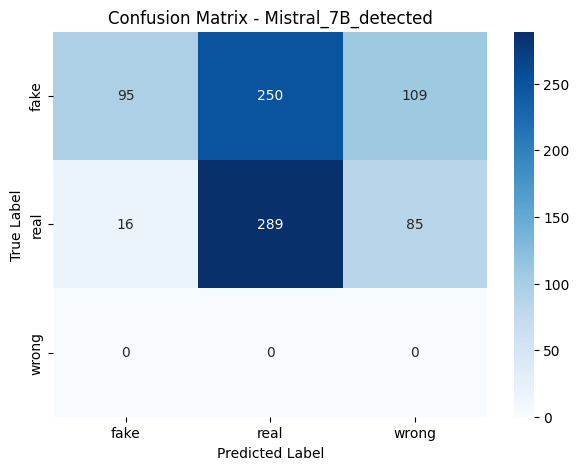




===== Evaluation for model: Llama3.2_3B_detected =====
Model: Llama3.2_3B_detected
Accuracy: 0.6315
Weighted F1-score: 0.6718
Classification Report:
              precision    recall  f1-score   support

        fake       0.74      0.74      0.74       454
        real       0.71      0.51      0.59       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.63       844
   macro avg       0.48      0.42      0.44       844
weighted avg       0.73      0.63      0.67       844



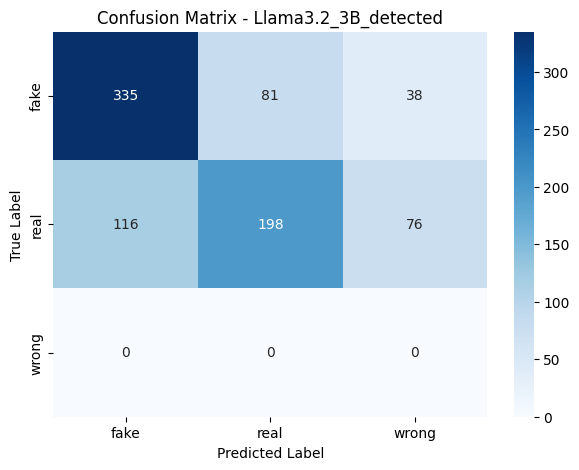




===== Evaluation for model: Llama3.2_3B_finetuned_detected =====
Model: Llama3.2_3B_finetuned_detected
Accuracy: 0.8021
Weighted F1-score: 0.8155
Classification Report:
              precision    recall  f1-score   support

        fake       0.89      0.78      0.83       454
        real       0.77      0.83      0.80       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.80       844
   macro avg       0.55      0.54      0.54       844
weighted avg       0.83      0.80      0.82       844



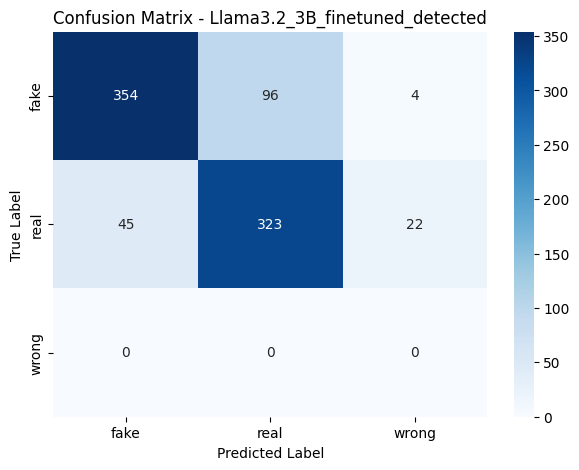




===== Evaluation for model: Qwen2.5_3B_detected =====
Model: Qwen2.5_3B_detected
Accuracy: 0.6647
Weighted F1-score: 0.6371
Classification Report:
              precision    recall  f1-score   support

        fake       0.65      0.95      0.77       454
        real       0.90      0.33      0.48       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.66       844
   macro avg       0.51      0.43      0.42       844
weighted avg       0.76      0.66      0.64       844



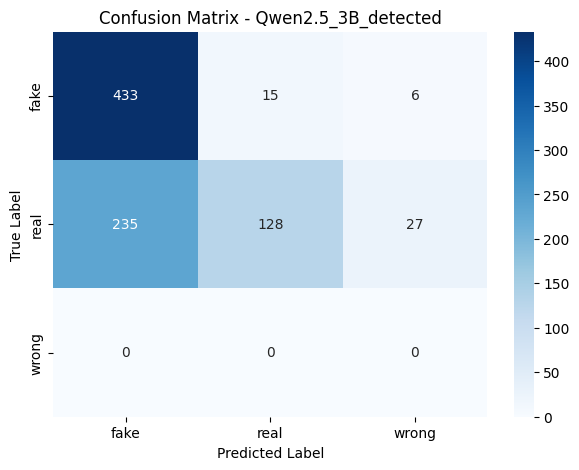




===== Evaluation for model: Qwen2.5_3B_finetuned_detected =====
Model: Qwen2.5_3B_finetuned_detected
Accuracy: 0.8199
Weighted F1-score: 0.8229
Classification Report:
              precision    recall  f1-score   support

        fake       0.80      0.93      0.86       454
        real       0.90      0.69      0.78       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.82       844
   macro avg       0.57      0.54      0.55       844
weighted avg       0.84      0.82      0.82       844



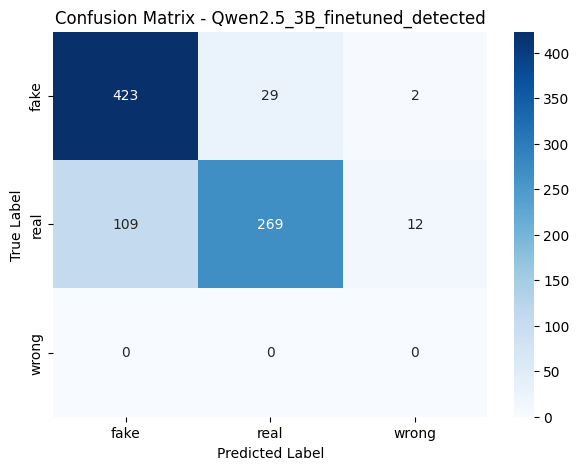




===== Evaluation for model: Meta_Llama3.1_8B_detected =====
Model: Meta_Llama3.1_8B_detected
Accuracy: 0.6090
Weighted F1-score: 0.5678
Classification Report:
              precision    recall  f1-score   support

        fake       0.61      0.93      0.74       454
        real       0.82      0.24      0.37       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.61       844
   macro avg       0.48      0.39      0.37       844
weighted avg       0.71      0.61      0.57       844



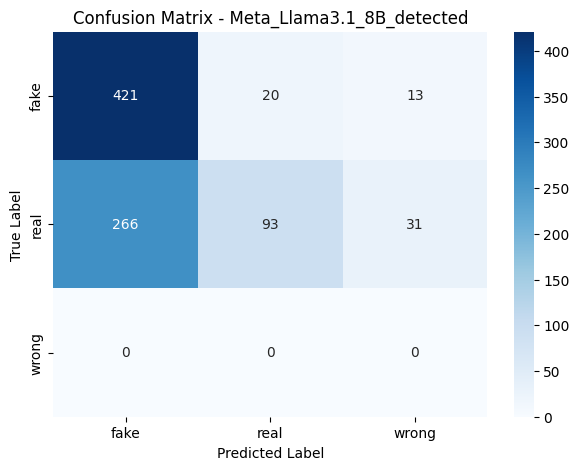




===== Evaluation for model: Meta-Llama3.1_8B_finetuned_detected =====
Model: Meta-Llama3.1_8B_finetuned_detected
Accuracy: 0.7654
Weighted F1-score: 0.7733
Classification Report:
              precision    recall  f1-score   support

        fake       0.96      0.61      0.74       454
        real       0.70      0.95      0.81       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.77       844
   macro avg       0.55      0.52      0.52       844
weighted avg       0.84      0.77      0.77       844



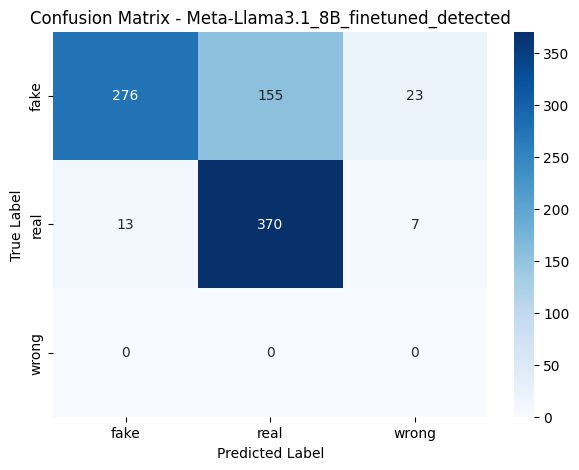




===== Evaluation for model: Gemma2_9b_detected =====
Model: Gemma2_9b_detected
Accuracy: 0.7737
Weighted F1-score: 0.7809
Classification Report:
              precision    recall  f1-score   support

        fake       0.79      0.85      0.82       454
        real       0.80      0.69      0.74       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.77       844
   macro avg       0.53      0.51      0.52       844
weighted avg       0.79      0.77      0.78       844



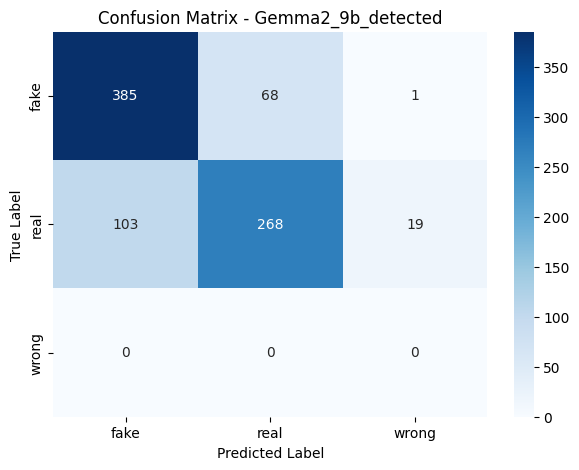




===== Evaluation for model: Gemma2_9b_finetuned_detected =====
Model: Gemma2_9b_finetuned_detected
Accuracy: 0.9159
Weighted F1-score: 0.9160
Classification Report:
              precision    recall  f1-score   support

        fake       0.96      0.88      0.92       454
        real       0.88      0.95      0.91       390
       wrong       0.00      0.00      0.00         0

    accuracy                           0.92       844
   macro avg       0.61      0.61      0.61       844
weighted avg       0.92      0.92      0.92       844



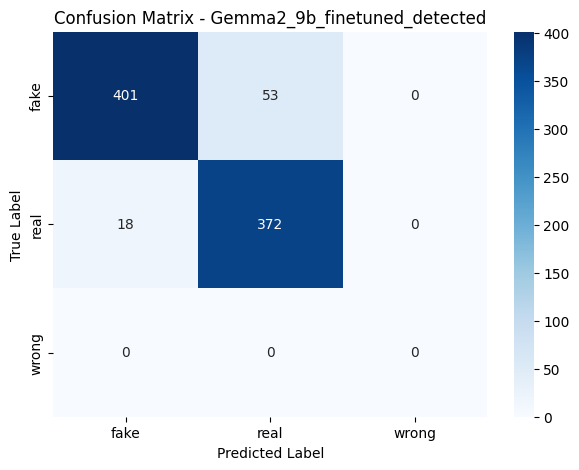

In [22]:
model_columns = [
    'Mistral_7B_detected',
    'Llama3.2_3B_detected',
    'Llama3.2_3B_finetuned_detected',
    'Qwen2.5_3B_detected',
    'Qwen2.5_3B_finetuned_detected',
    'Meta_Llama3.1_8B_detected',
    'Meta-Llama3.1_8B_finetuned_detected',
    'Gemma2_9b_detected',
    'Gemma2_9b_finetuned_detected'
]

for model_col in model_columns:
    print(f"===== Evaluation for model: {model_col} =====")
    evaluate_label(df, true_col='label', pred_col=model_col)
    print("\n\n")